In [1]:
import datetime
import json
import warnings

import numpy as np
import rasterio
import requests
import stac
import wtss
import xarray as xr
from pyproj import CRS, Proj, transform
from rasterio.windows import Window

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from eocube import DataCube, config

warnings.filterwarnings("ignore")

config.ACCESS_TOKEN = "a6gB61oddyHxMAZ08y098ynEq0s1hQ3siDZao245CV"

In [2]:
# bbox = [-56.5009689, -10.7164420, -56.3526535, -10.8238641] # Mato Grosso
# bbox = [-46.01348876953125, -23.08478515994374, -45.703125, -23.34856015148709] # Interior de SP São José
# bbox = [-64.0988088, -8.7845055, -64.0905046, -8.7918638] # Mato Grosso
# bbox = [-64.2322540, -8.5769474, -63.7756348, -8.824010]
bbox = [-63.9624023, -8.6760635, -63.8573456, -8.7588666]

eocube_service = DataCube(
    collections=["CB4_64_16D_STK-1"],
    query_bands=['red','green', 'blue'],
    bbox=bbox,
    start_date="2018-08-01",
    end_date="2019-07-31"
)

In [3]:
data = eocube_service.getDataCube()
data

<xarray.DataArray (band: 3, time: 24, latitude: 151, longitude: 172)>
array([[[[ 466,  464,  476, ...,  479,  491,  471],
         [ 461,  464,  468, ...,  462,  489,  487],
         [ 466,  488,  495, ...,  465,  457,  481],
         ...,
         [ 993, 1009, 1054, ..., 1363, 1382, 1336],
         [1014, 1034, 1063, ..., 1370, 1384, 1401],
         [ 873,  845,  983, ..., 1285, 1404, 1462]],

        [[ 376,  357,  359, ...,  400,  386,  402],
         [ 373,  346,  334, ...,  382,  381,  380],
         [ 365,  347,  345, ...,  379,  375,  366],
         ...,
         [ 899,  921, 1059, ..., 1384, 1433, 1451],
         [ 923,  990, 1090, ..., 1428, 1438, 1455],
         [ 819,  857,  948, ..., 1432, 1414, 1443]],

        [[1129, 1140, 1129, ..., 1053, 1040, 1024],
         [1125, 1132, 1132, ..., 1058, 1055, 1053],
         [1122, 1130, 1126, ..., 1051, 1044, 1057],
         ...,
...
         ...,
         [ 460,  438,  470, ...,  816,  761,  802],
         [ 446,  463,  471, ...,  821,  811,  901],
         [ 430,  426,  416, ...,  817,  771,  816]],

        [[ 383,  397,  362, ...,  312,  316,  325],
         [ 386,  388,  373, ...,  295,  311,  319],
         [ 395,  396,  387, ...,  292,  329,  337],
         ...,
         [ 520,  537,  536, ...,  877,  840,  933],
         [ 509,  511,  529, ...,  841,  904,  824],
         [ 496,  501,  515, ...,  849,  853,  862]],

        [[ 364,  366,  386, ...,  372,  365,  373],
         [ 364,  377,  385, ...,  357,  366,  354],
         [ 350,  350,  357, ...,  380,  359,  348],
         ...,
         [ 522,  543,  561, ...,  897,  869,  887],
         [ 527,  549,  559, ...,  831,  895,  902],
         [ 463,  482, 1160, ...,  931,  952,  891]]]], dtype=int16)
Coordinates:
  * band       (band) <U5 'red' 'green' 'blue'
  * time       (time) datetime64[ns] 2018-07-28 2018-08-13 ... 2019-07-28
  * latitude   (latitude) int64 0 1 2 3 4 5 6 7 ... 144 145 146 147 148 149 150
  * longitude  (longitude) int64 0 1 2 3 4 5 6 7 ... 165 166 167 168 169 170 171
Attributes:
    CB4_64_16D_STK-1:  {'id': 'CB4_64_16D_STK-1', 'title': 'CBERS-4 - AWFI - ...

In [6]:
blue = data.loc['blue','2018-07-28']
blue

<xarray.DataArray (latitude: 151, longitude: 172)>
array([[ 570,  572,  562, ...,  560,  553,  573],
       [ 563,  565,  565, ...,  557,  572,  557],
       [ 558,  549,  557, ...,  546,  569,  581],
       ...,
       [ 855,  851,  854, ..., 1121, 1099, 1118],
       [ 861,  860,  851, ..., 1109, 1091, 1107],
       [ 819,  809,  797, ..., 1101, 1121, 1098]], dtype=int16)
Coordinates:
    band       <U5 'blue'
    time       datetime64[ns] 2018-07-28
  * latitude   (latitude) int64 0 1 2 3 4 5 6 7 ... 144 145 146 147 148 149 150
  * longitude  (longitude) int64 0 1 2 3 4 5 6 7 ... 165 166 167 168 169 170 171
Attributes:
    CB4_64_16D_STK-1:  {'id': 'CB4_64_16D_STK-1', 'title': 'CBERS-4 - AWFI - ...

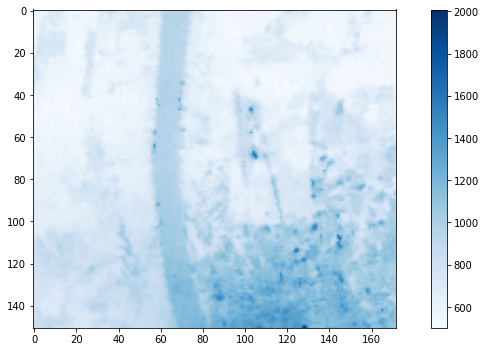

In [7]:
plt.figure(figsize=(10, 5))
colormap = plt.get_cmap('Blues', 1000)
plt.imshow(
    blue,
    cmap=colormap
)
plt.tight_layout()
plt.colorbar()

plt.show()

In [3]:
raster = eocube_service.getImages()[0]

In [11]:
raster._afimPointsToCoord(-1, 9, 'red')

(-66.64329875327383, -6.943719810906391)

In [13]:
raster._afimCoordsToPoint(-66.64329875327383, -6.943719810906391, 'red')

(-1, 9)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


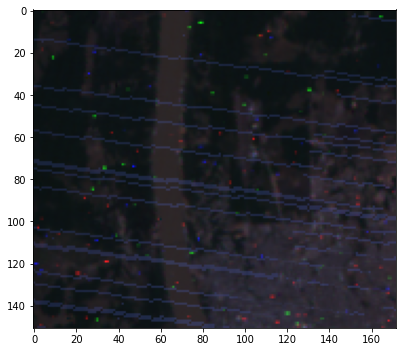

In [5]:
plt.figure(figsize=(10, 5))
plt.imshow(raster.getRGB())
plt.tight_layout()

plt.show()